# Problem 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn import preprocessing
data = pd.read_csv('forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:
data.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


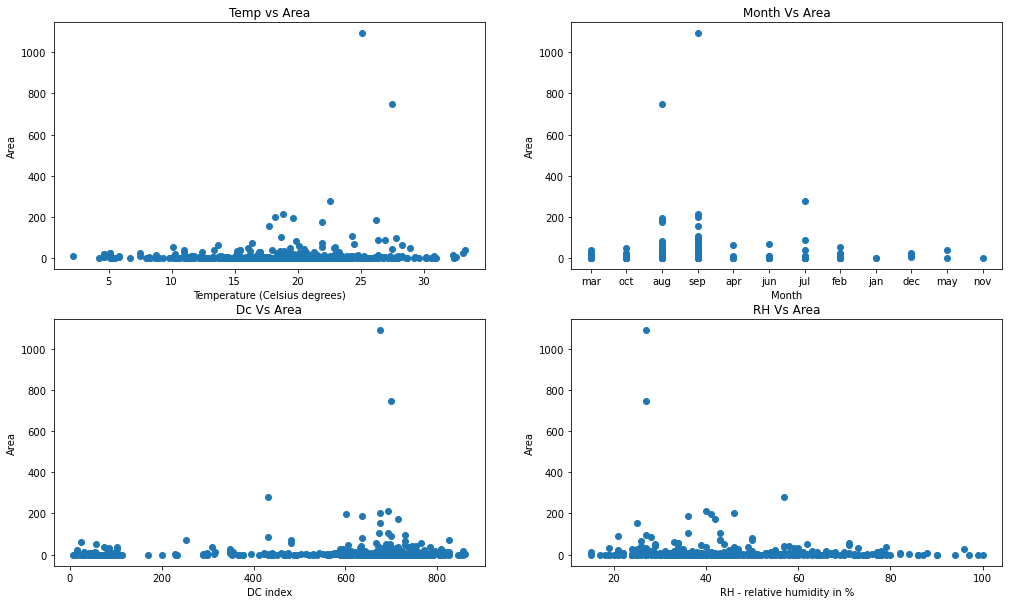

In [3]:
pfig, axs = plt.subplots(2, 2,figsize = (17,10))
axs[0, 0].scatter(data['temp'],data['area'])
axs[0, 0].set_title('Temp vs Area')
axs[0, 0].set_xlabel('Temperature (Celsius degrees)')
axs[0, 1].scatter(data['month'],data['area'])
axs[0, 1].set_title('Month Vs Area')
axs[0, 1].set_xlabel('Month')
axs[1, 0].scatter(data['DC'],data['area'])
axs[1, 0].set_title('Dc Vs Area')
axs[1, 0].set_xlabel('DC index')
axs[1, 1].scatter(data['RH'],data['area'])
axs[1, 1].set_title('RH Vs Area')
axs[1, 1].set_xlabel('RH - relative humidity in %')


for ax in axs.flat:
    ax.set( ylabel='Area')


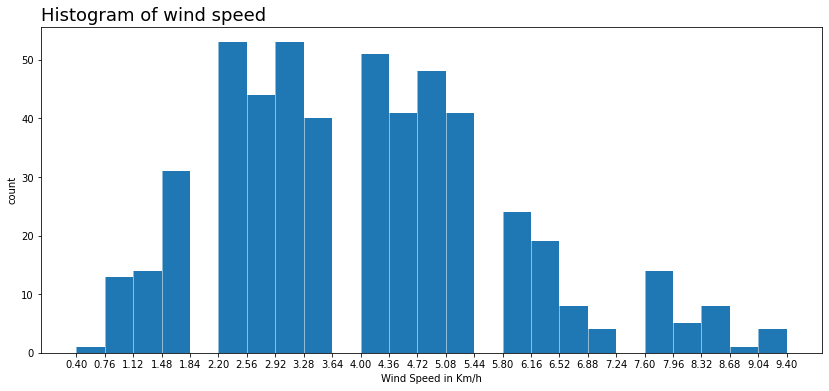

In [4]:
fig = plt.figure(figsize=(14,6))
n, bins, patches = plt.hist(data['wind'], bins=25)
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.xlabel("Wind Speed in Km/h")
plt.ylabel("count")
plt.title('Histogram of wind speed', loc = 'left', fontsize = 18)
plt.show()

In [5]:
print("summary statistics for wind attribute: \n", data.wind.describe())

summary statistics for wind attribute: 
 count    517.000000
mean       4.017602
std        1.791653
min        0.400000
25%        2.700000
50%        4.000000
75%        4.900000
max        9.400000
Name: wind, dtype: float64


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


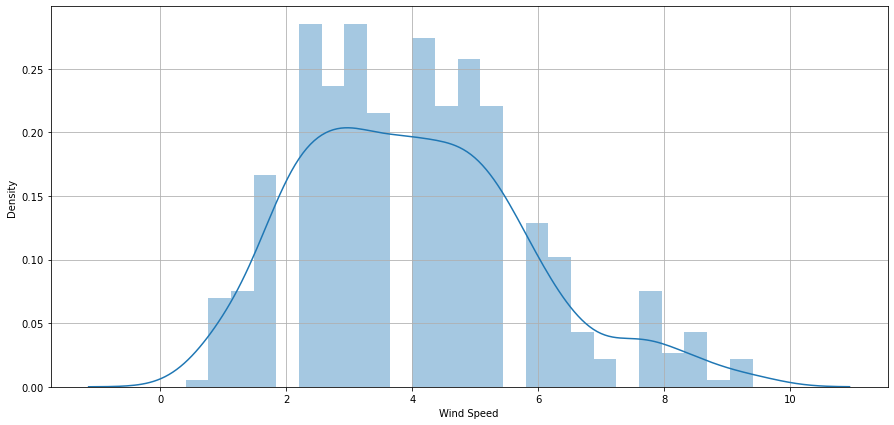

In [6]:
plt.figure(figsize=(15,7))
sns.distplot(data.wind,bins = 25,kde = True,hist = True)
plt.xlabel('Wind Speed')
plt.grid(True)

array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='RH', ylabel='temp'>,
        <AxesSubplot:xlabel='DC', ylabel='temp'>,
        <AxesSubplot:xlabel='DMC', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>,
        <AxesSubplot:xlabel='DC', ylabel='RH'>,
        <AxesSubplot:xlabel='DMC', ylabel='RH'>],
       [<AxesSubplot:xlabel='temp', ylabel='DC'>,
        <AxesSubplot:xlabel='RH', ylabel='DC'>,
        <AxesSubplot:xlabel='DC', ylabel='DC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DC'>],
       [<AxesSubplot:xlabel='temp', ylabel='DMC'>,
        <AxesSubplot:xlabel='RH', ylabel='DMC'>,
        <AxesSubplot:xlabel='DC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DMC'>]], dtype=object)

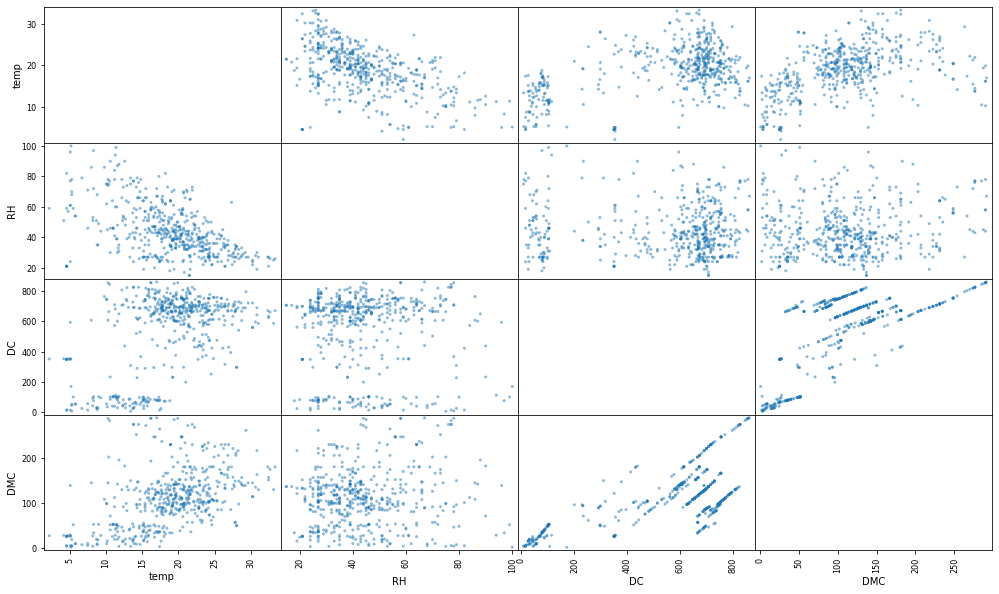

In [7]:
pd.plotting.scatter_matrix(data[['temp','RH','DC','DMC']], figsize=(17,10), diagonal=None)

Text(0, 0.5, 'DC Range')

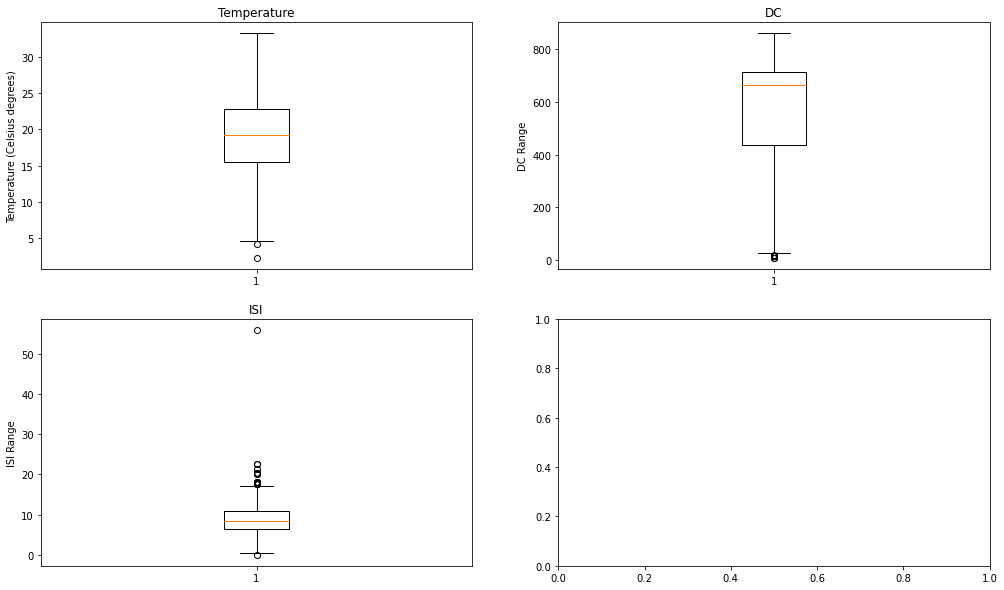

In [8]:
pfig, axs = plt.subplots(2, 2,figsize = (17,10))
axs[0, 0].boxplot(data['temp'])
axs[0, 0].set_title('Temperature')
axs[0, 0].set_ylabel('Temperature (Celsius degrees)')
axs[1, 0].boxplot(data['ISI'])
axs[1, 0].set_title('ISI')
axs[1, 0].set_ylabel('ISI Range')
axs[0, 1].boxplot(data['DC'])
axs[0, 1].set_title('DC')
axs[0, 1].set_ylabel('DC Range')



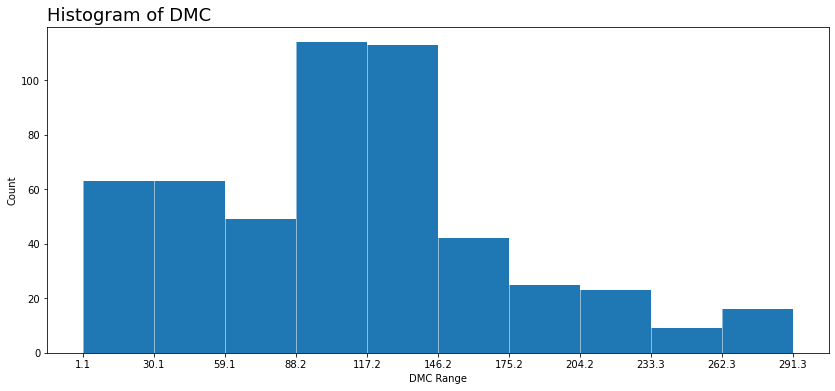

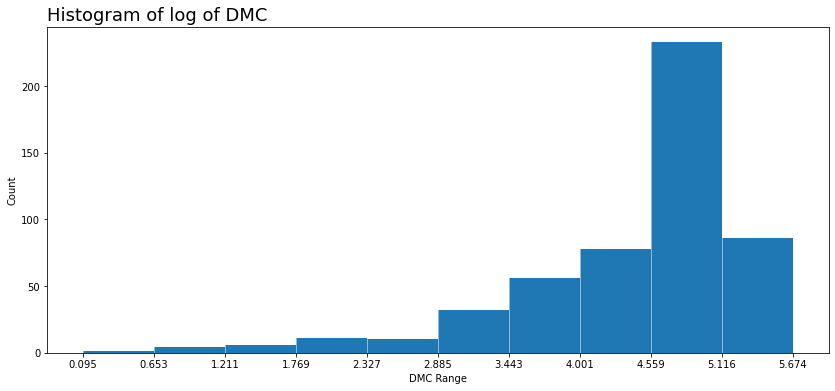

In [9]:

fig = plt.figure(figsize=(14,6))
n, bins, patches = plt.hist(data['DMC'])
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.xlabel("DMC Range")
plt.ylabel("Count")
plt.title('Histogram of DMC', loc = 'left', fontsize = 18)
plt.show()

logdata = np.log(data['DMC'])

fig2 = plt.figure(figsize=(14,6))
n, bins, patches = plt.hist(logdata)
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.xlabel("DMC Range")
plt.ylabel("Count")
plt.title('Histogram of log of DMC', loc = 'left', fontsize = 18)
plt.show()



<AxesSubplot:xlabel='month', ylabel='count'>

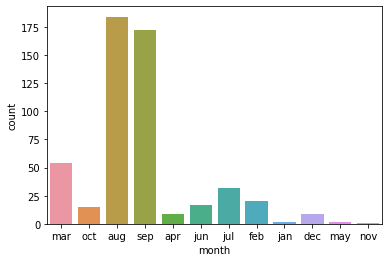

In [10]:
sns.countplot(x=data['month'])

# Problem 2

In [11]:
rawdata_df = pd.read_csv('raw_data.csv')
print(rawdata_df)
Ndata = (rawdata_df - rawdata_df.mean()) / rawdata_df.std() 
print(Ndata)

             A         B  C   D
0     8.257164 -0.656075  6   8
1    10.557378 -0.715829  7   8
2     8.744211  0.799611  7   5
3     6.555028  1.583217  6  10
4     9.362121  1.027202  7   8
..         ...       ... ..  ..
328   8.446495  0.190962  6  14
329   8.117877 -1.334359  7   5
330  10.329845  1.038282  6   7
331   7.592486  0.157830  4  10
332   8.912645 -0.243661  7   2

[333 rows x 4 columns]
            A         B         C         D
0   -0.460472 -0.687000 -0.201969 -0.293123
1    0.827801 -0.746780  0.470589 -0.293123
2   -0.187693  0.769317  0.470589 -1.250085
3   -1.413781  1.553264 -0.201969  0.344851
4    0.158377  0.997008  0.470589 -0.293123
..        ...       ...       ...       ...
328 -0.354434  0.160405 -0.201969  1.620799
329 -0.538482 -1.365578  0.470589 -1.250085
330  0.700367  1.008092 -0.201969 -0.612110
331 -0.832736  0.127258 -1.547086  0.344851
332 -0.093359 -0.274407  0.470589 -2.207046

[333 rows x 4 columns]


Text(0, 0.5, 'Units')

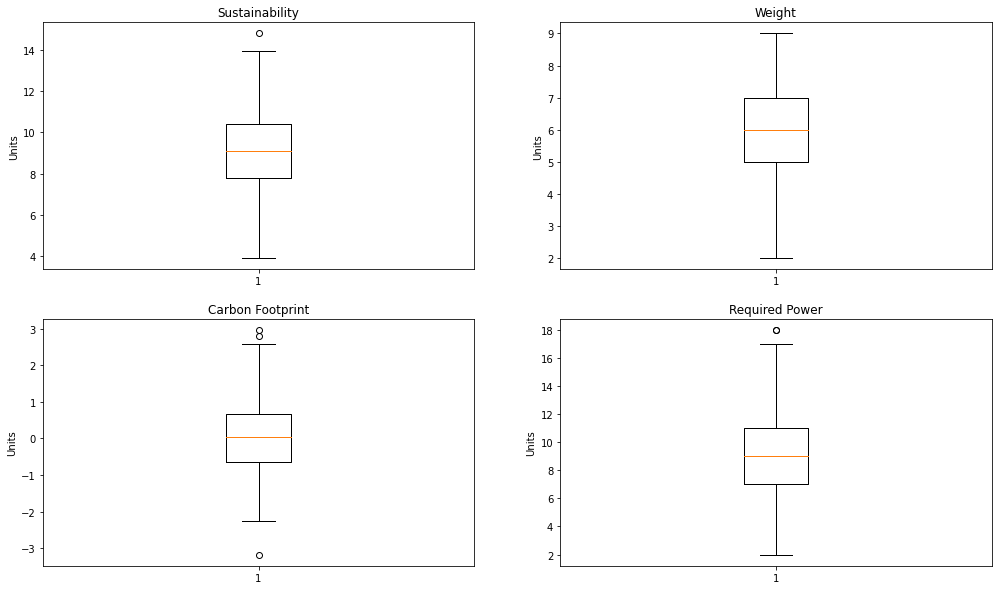

In [12]:
pfig, axs = plt.subplots(2, 2,figsize = (17,10))
axs[0, 0].boxplot(rawdata_df['A'])
axs[0, 0].set_title('Sustainability')
axs[0, 0].set_ylabel('Units')
axs[1, 0].boxplot(rawdata_df['B'])
axs[1, 0].set_title('Carbon Footprint')
axs[1, 0].set_ylabel('Units')
axs[0, 1].boxplot(rawdata_df['C'])
axs[0, 1].set_title('Weight')
axs[0, 1].set_ylabel('Units')
axs[1, 1].boxplot(rawdata_df['D'])
axs[1, 1].set_title('Required Power')
axs[1, 1].set_ylabel('Units')

Text(0, 0.5, 'Units')

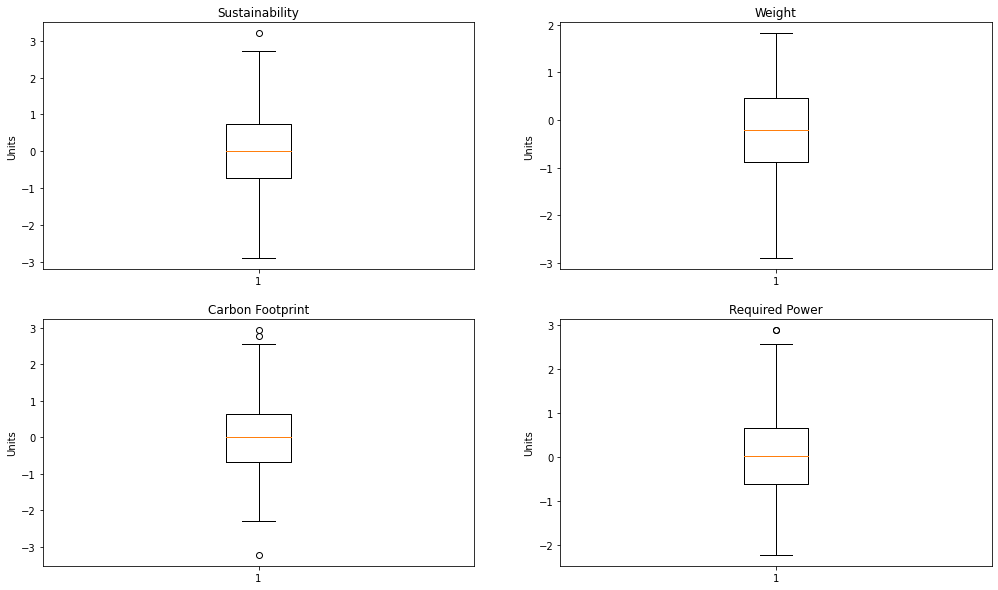

In [13]:
pfig, axs = plt.subplots(2, 2,figsize = (17,10))
axs[0, 0].boxplot(Ndata['A'])
axs[0, 0].set_title('Sustainability')
axs[0, 0].set_ylabel('Units')
axs[1, 0].boxplot(Ndata['B'])
axs[1, 0].set_title('Carbon Footprint')
axs[1, 0].set_ylabel('Units')
axs[0, 1].boxplot(Ndata['C'])
axs[0, 1].set_title('Weight')
axs[0, 1].set_ylabel('Units')
axs[1, 1].boxplot(Ndata['D'])
axs[1, 1].set_title('Required Power')
axs[1, 1].set_ylabel('Units')

Text(0, 0.5, 'B')

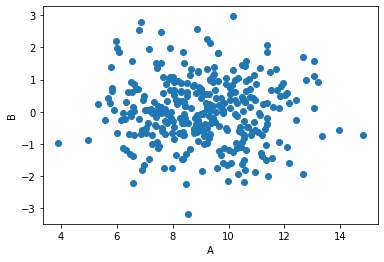

In [14]:
plt.scatter(rawdata_df['A'],rawdata_df['B'])
plt.xlabel('A')
plt.ylabel('B')

# Problem 3

In [15]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Problem 3.a:

name - nominal
mfr  - nominal
type - nominal
calories - numerical
protein - numerical
fat  - numerical
sodium - numerical
fiber - numerical
carbo - numerical
sugars - numerical
potass - numerical
vitamins - ordinal (we assume 0<25<100)
shelf - nominal
weight - numerical
cups - numerical
rating - numerical


In [16]:
print(cereals_df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','weight','cups','rating']].describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass     weight       cups     rating  
count  76.000000   75.000000  77.000000  77.000000  77.000000  
mean    7.026316   98.666667   1.029610   0.821039  42.665705  
std     4.378656   70.410636   0.150477   0.232716  14.047289  
min     0.000000   15.000000   0.500000   0.250000

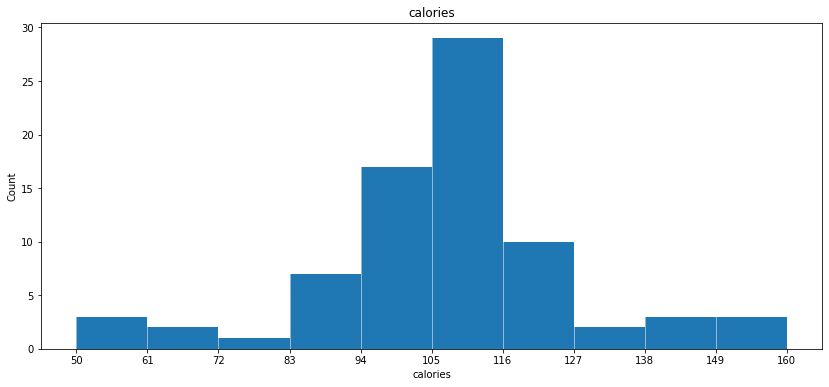

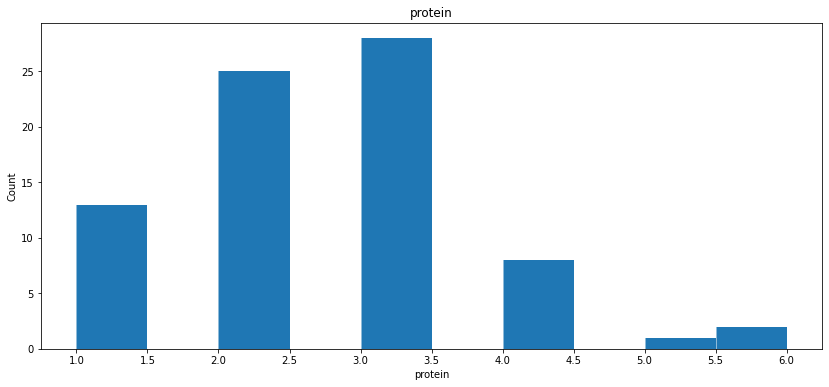

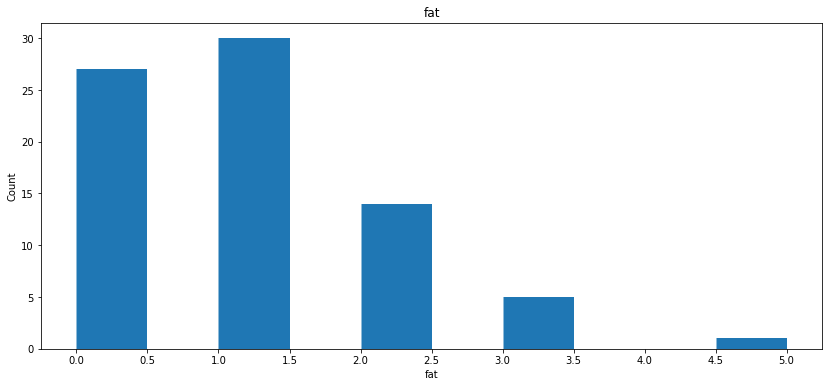

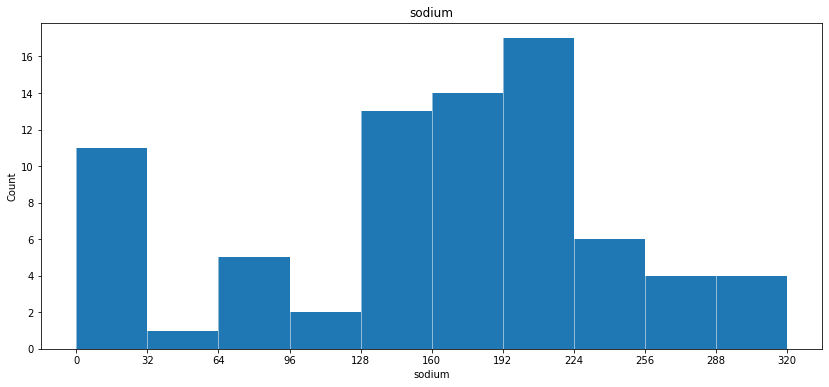

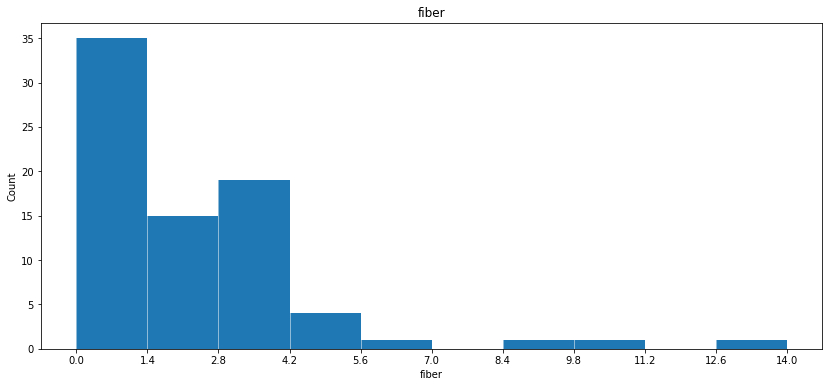

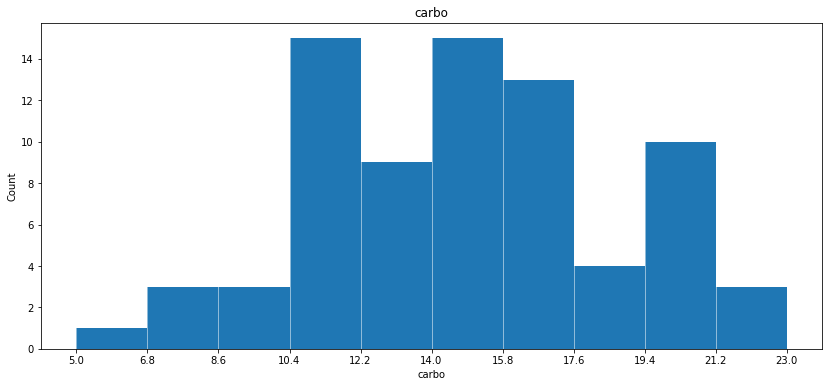

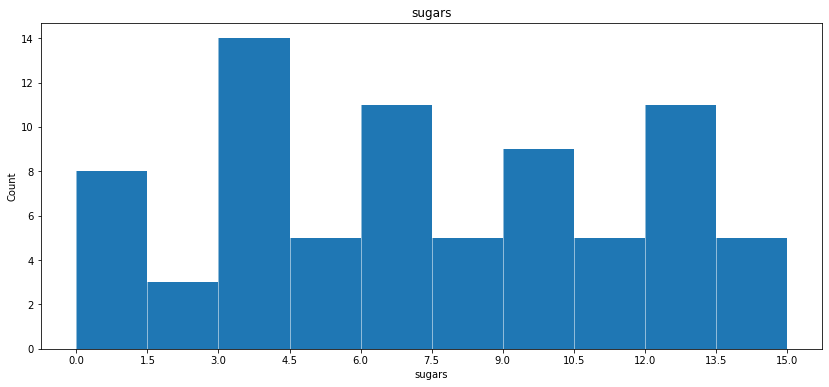

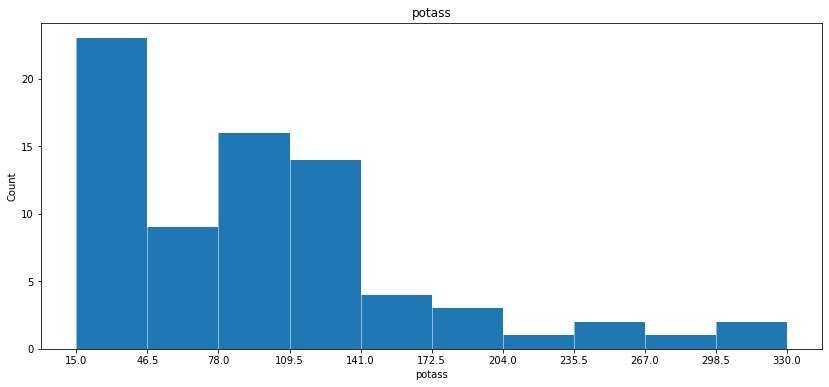

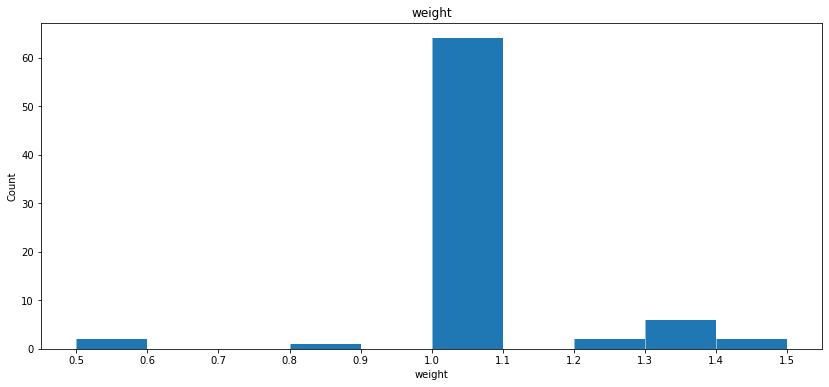

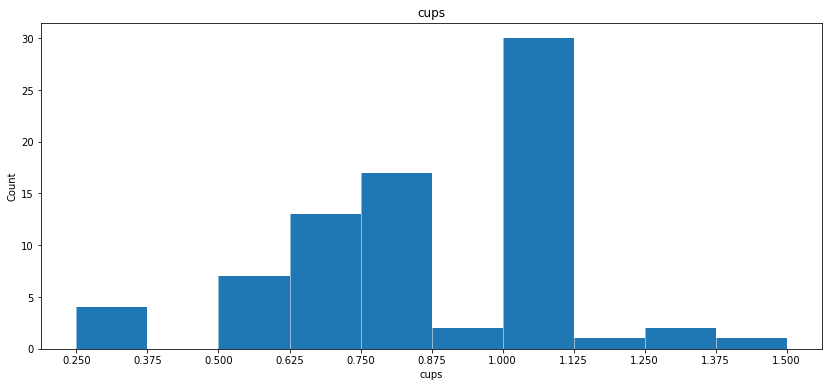

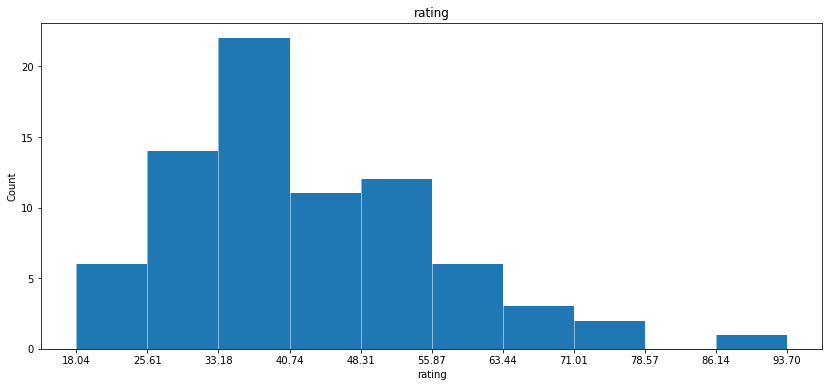

In [17]:
colums_array = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','weight','cups','rating']
for i in colums_array:
    
    fig = plt.figure(figsize=(14,6))
    n, bins, patches = plt.hist(cereals_df[i])
    plt.xticks(bins)
    plt.grid(color='white', lw = 0.5, axis='x')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='type', ylabel='calories'>

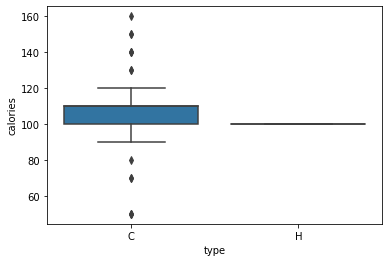

In [18]:
sns.boxplot(y=cereals_df['calories'],x=cereals_df['type'])

<AxesSubplot:xlabel='shelf', ylabel='rating'>

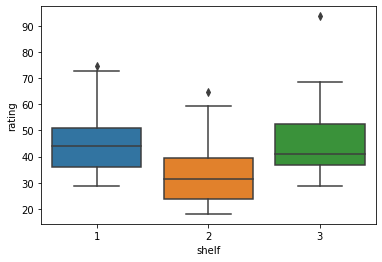

In [19]:
sns.boxplot(y=cereals_df['rating'],x=cereals_df['shelf'])

In [20]:
numdata = cereals_df.iloc[:,[3,4,5,6,7,8,9,10,13,14,15]]
numdata

cor_numdata = numdata.corr()
print(cor_numdata)



          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.257638   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.025012   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.300003   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.297687   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.380357   
carbo     0.257638 -0.025012 -0.300003  0.297687 -0.380357  1.000000   
sugars    0.566533 -0.291853  0.302497  0.058866 -0.138760 -0.471184   
potass   -0.072063  0.563706  0.200445 -0.042632  0.911528 -0.365003   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.138467   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.367460   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.088712   

            sugars    potass    weight      cups    rating  
calories  0.566533 -0.072063  0.696091  0.087200 -0.689376  
protein  -0.2

<AxesSubplot:>

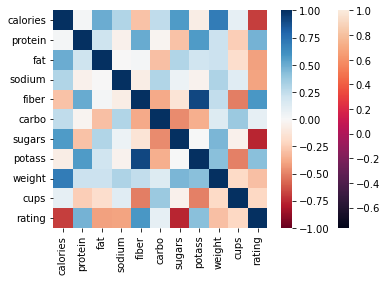

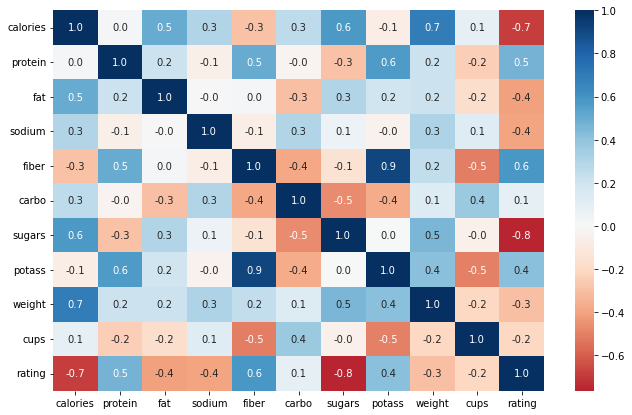

In [21]:


sns.heatmap(cor_numdata, xticklabels=cor_numdata.columns, 
yticklabels=cor_numdata.columns) 

sns.heatmap(cor_numdata, xticklabels=cor_numdata.columns, 
yticklabels=cor_numdata.columns, vmin=-1, vmax=1, cmap="RdBu") 

fig, ax = plt.subplots() 
fig.set_size_inches(11, 7) 
sns.heatmap(cor_numdata, annot=True, fmt=".1f", cmap="RdBu", 
center=0, ax=ax)

# Problem 4

In [22]:
house_df = pd.read_csv('BostonHousing.csv')
print(house_df)

Nhousedata = (house_df - house_df.mean()) / house_df.std() 
print(Nhousedata)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  CAT. MEDV  
0       15.3   4.98  24.0          0  
1       17.8   9.14  21.6          0  
2     

               CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.324032  0.740660  0.355787  0.574977 -0.357202   
ZN        -0.324032  1.000000 -0.463989 -0.089639 -0.600467 -0.060856   
INDUS      0.740660 -0.463989  1.000000  0.433564  0.604843 -0.141075   
CHAS       0.355787 -0.089639  0.433564  1.000000  0.147100 -0.020791   
NOX        0.574977 -0.600467  0.604843  0.147100  1.000000 -0.008553   
RM        -0.357202 -0.060856 -0.141075 -0.020791 -0.008553  1.000000   
AGE        0.477854 -0.690700  0.542237  0.111243  0.823355  0.070562   
DIS       -0.465483  0.704456 -0.540220 -0.172968 -0.802431 -0.042883   
RAD        0.903133 -0.360213  0.655450  0.286266  0.521816 -0.355441   
TAX        0.836825 -0.174873  0.729739  0.271697  0.414816 -0.348041   
PTRATIO    0.354550 -0.281469  0.230266  0.172237 -0.159053 -0.317918   
LSTAT      0.130750 -0.126234 -0.150063 -0.145671  0.341341 -0.238065   
MEDV       0.454883 -0.226426  0.495624  0.261985  

<AxesSubplot:>

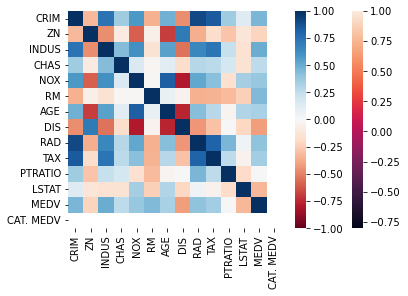

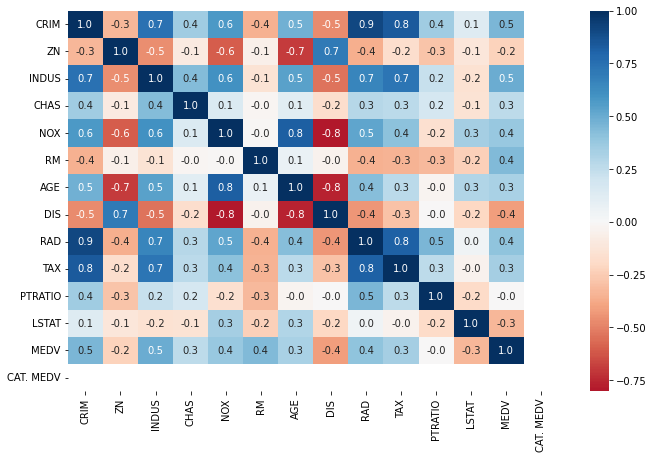

In [23]:
medvdf = house_df[house_df['CAT. MEDV'] == 1]
medvdf
cormedvdf = medvdf.corr()
print(cormedvdf)

sns.heatmap(cormedvdf, xticklabels=cormedvdf.columns, 
yticklabels=cormedvdf.columns) 

sns.heatmap(cormedvdf, xticklabels=cormedvdf.columns, 
yticklabels=cormedvdf.columns, vmin=-1, vmax=1, cmap="RdBu") 

fig, ax = plt.subplots() 
fig.set_size_inches(11, 7) 
sns.heatmap(cormedvdf, annot=True, fmt=".1f", cmap="RdBu", 
center=0, ax=ax)



In [24]:
 
X = house_df 
pca = PCA(n_components = 14)

X_pca = pca.fit_transform(X)
print("components: \n",pca.components_)

explained_variance = pca.explained_variance_ratio_
print("\n variance:\n",explained_variance)


components: 
 [[ 2.96467374e-02 -4.49235825e-02  2.93953284e-02 -5.07098341e-05
   4.61594033e-04 -1.22545302e-03  8.63086083e-02 -6.76024881e-03
   4.67053673e-02  9.92637007e-01  5.91089202e-03  2.32163764e-02
  -2.56580387e-02 -6.08716740e-04]
 [-1.50033565e-02  6.31040674e-01 -8.85156053e-02 -9.06010013e-04
  -1.81703988e-03  5.00847849e-03 -7.52347576e-01  4.47584745e-02
   2.57215258e-03  1.01543286e-01 -1.13717724e-02 -9.68853943e-02
   7.63371561e-02  2.65299151e-03]
 [ 2.68280559e-02  7.63872906e-01 -1.30412452e-02  9.29587688e-04
   6.92228655e-04  6.37036258e-03  6.39715116e-01  1.74047950e-03
  -1.81546245e-02 -1.99816151e-02 -3.29909709e-02  4.08993811e-02
   5.29346875e-02  5.99016749e-03]
 [-3.09902191e-01 -9.17071728e-02 -5.41947147e-02  5.56421827e-03
  -2.75376571e-04  4.63341060e-02  8.10953856e-02 -3.25832713e-02
   2.35791508e-02  3.05852143e-02 -5.89677735e-02 -4.58463606e-01
   8.16701241e-01  2.52767993e-02]
 [ 9.16100923e-01 -4.19903214e-02 -1.25769355e-01  9.6

In [25]:
Y = Nhousedata 
pca = PCA(n_components = 14)

Y_pca = pca.fit_transform(Y)
print("components: \n",pca.components_)

explained_variance = pca.explained_variance_ratio_
print("\n variance:\n",explained_variance)

components: 
 [[-0.23229491  0.25079278 -0.32981464  0.00865938 -0.31713268  0.22246114
  -0.29149994  0.28903213 -0.29210834 -0.31554391 -0.2173303  -0.31496188
   0.28371771  0.20950193]
 [ 0.07974319 -0.06279522  0.12857115  0.2643755   0.24806062  0.41350814
   0.23492166 -0.32538117  0.16047628  0.12532543 -0.2302942  -0.13945059
   0.40770098  0.47909041]
 [ 0.43845123  0.39833791 -0.07367341 -0.30963421 -0.11011682  0.1692963
  -0.23819677  0.22893562  0.44007128  0.3754089   0.180961   -0.06304104
   0.01646805  0.16205959]
 [ 0.12189516  0.29085343  0.01140719  0.87020665 -0.01465244 -0.16334751
  -0.14546176  0.20274088  0.11075489  0.09662917 -0.0795597   0.07680132
  -0.08517176 -0.11362119]
 [ 0.18038656  0.37888388 -0.00644806 -0.23972506  0.22113582 -0.21152817
   0.10863148  0.0038844  -0.13932319 -0.06108247 -0.70947909  0.32884418
  -0.12902711  0.09822331]
 [ 0.71042136 -0.27991125 -0.35357766  0.10739959 -0.23551893  0.00641037
   0.13101956 -0.08519095 -0.16396548 